In [1]:
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%pylab inline
import os
import pandas as pd
import librosa
import librosa.display
import glob 
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [2]:
# gather software versions
import tensorflow as tf; print('tensorflow version: ', tf.__version__)
import keras; print('keras version: ',keras.__version__)

tensorflow version:  1.10.0
keras version:  2.2.4


Using TensorFlow backend.


In [6]:
# parent folder of sound files
INPUT_DIR="."
# 16 KHz
SAMPLE_RATE = 16000
# seconds
MAX_SOUND_CLIP_DURATION=12

In [7]:
# check what is inside each directory and content
!pwd
!ls -all ../input

'pwd' is not recognized as an internal or external command,
operable program or batch file.
'ls' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
set_a=pd.read_csv(INPUT_DIR+"/set_a.csv")
set_a.head()

dataset                             fname     label  sublabel
0       a  set_a/artifact__201012172012.wav  artifact       NaN
1       a  set_a/artifact__201105040918.wav  artifact       NaN
2       a  set_a/artifact__201105041959.wav  artifact       NaN
3       a  set_a/artifact__201105051017.wav  artifact       NaN
4       a  set_a/artifact__201105060108.wav  artifact       NaN

In [9]:
set_a_timing=pd.read_csv(INPUT_DIR+"/set_a_timing.csv")
set_a_timing.head()

fname  cycle sound  location
0  set_a/normal__201102081321.wav      1    S1     10021
1  set_a/normal__201102081321.wav      1    S2     20759
2  set_a/normal__201102081321.wav      2    S1     35075
3  set_a/normal__201102081321.wav      2    S2     47244
4  set_a/normal__201102081321.wav      3    S1     62992

In [10]:
set_b=pd.read_csv(INPUT_DIR+"/set_b.csv")
set_b.head()

dataset                                              fname       label  \
0       b  set_b/Btraining_extrastole_127_1306764300147_C...  extrastole   
1       b  set_b/Btraining_extrastole_128_1306344005749_A...  extrastole   
2       b  set_b/Btraining_extrastole_130_1306347376079_D...  extrastole   
3       b  set_b/Btraining_extrastole_134_1306428161797_C...  extrastole   
4       b  set_b/Btraining_extrastole_138_1306762146980_B...  extrastole   

  sublabel  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

In [11]:
#merge both set-a and set-b
frames = [set_a, set_b]
train_ab=pd.concat(frames)
train_ab.describe()

dataset                                          fname   label  \
count      832                                            832     585   
unique       2                                            832       5   
top          b  set_b/Bunlabelledtest_300_1311772096120_B.wav  normal   
freq       656                                              1     351   

           sublabel  
count           149  
unique            2  
top     noisynormal  
freq            120

In [12]:
#get all unique labels
nb_classes=train_ab.label.unique()

print("Number of training examples=", train_ab.shape[0], "  Number of classes=", len(train_ab.label.unique()))
print (nb_classes)

Number of training examples= 832   Number of classes= 6
['artifact' 'extrahls' 'murmur' 'normal' nan 'extrastole']


Min samples per category =  19
Max samples per category =  351


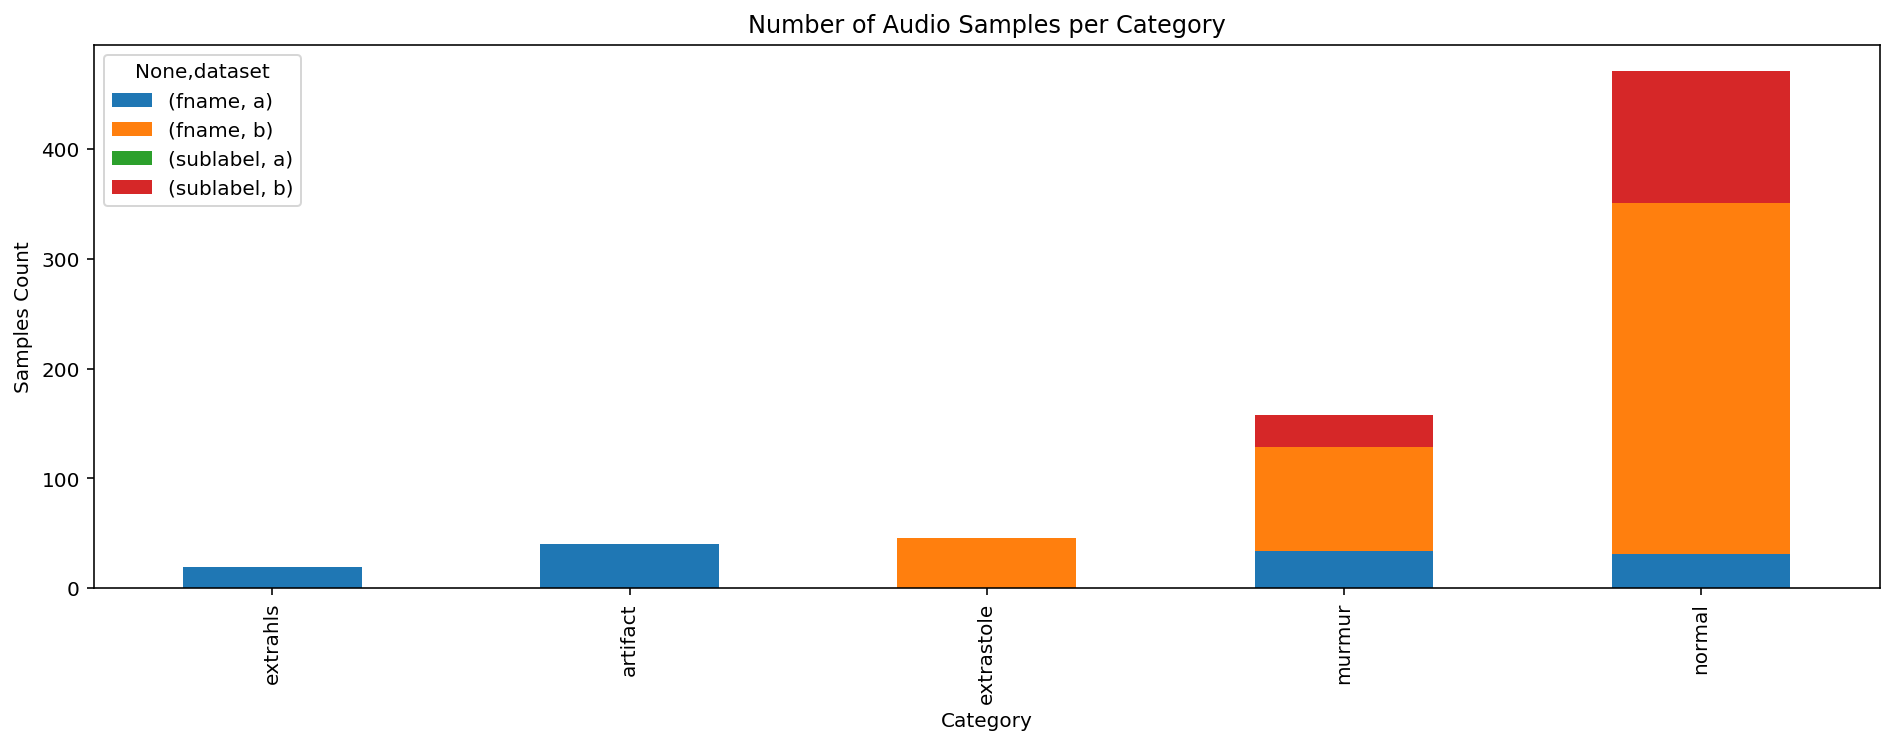

In [13]:
# visualize data distribution by category
category_group = train_ab.groupby(['label','dataset']).count()
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
          .plot(kind='bar', stacked=True, title="Number of Audio Samples per Category", figsize=(16,5))
plot.set_xlabel("Category")
plot.set_ylabel("Samples Count");

print('Min samples per category = ', min(train_ab.label.value_counts()))
print('Max samples per category = ', max(train_ab.label.value_counts()))

In [14]:
print('Minimum samples per category = ', min(train_ab.label.value_counts()))
print('Maximum samples per category = ', max(train_ab.label.value_counts()))

Minimum samples per category =  19
Maximum samples per category =  351


In [15]:
normal_file=INPUT_DIR+"/set_a/normal__201106111136.wav"

In [16]:
# heart it
import IPython.display as ipd
ipd.Audio(normal_file) 

# 1. Normal case

In the Normal category there are normal, healthy heart sounds. These may contain noise in the final second of the recording as the device is removed from the body. They may contain a variety of background noises (from traffic to radios). They may also contain occasional random noise corresponding to breathing, or brushing the microphone against clothing or skin. A normal heart sound has a clear “lub dub, lub dub” pattern, with the time from “lub” to “dub” shorter than the time from “dub” to the next “lub” (when the heart rate is less than 140 beats per minute)(source: Rita Getz)

In [17]:
# Load using Librosa
y, sr = librosa.load(normal_file, duration=5)   #default sampling rate is 22 HZ
dur=librosa.get_duration(y)
print ("duration:", dur)
print(y.shape, sr)

duration: 4.963809523809524
(109452,) 22050


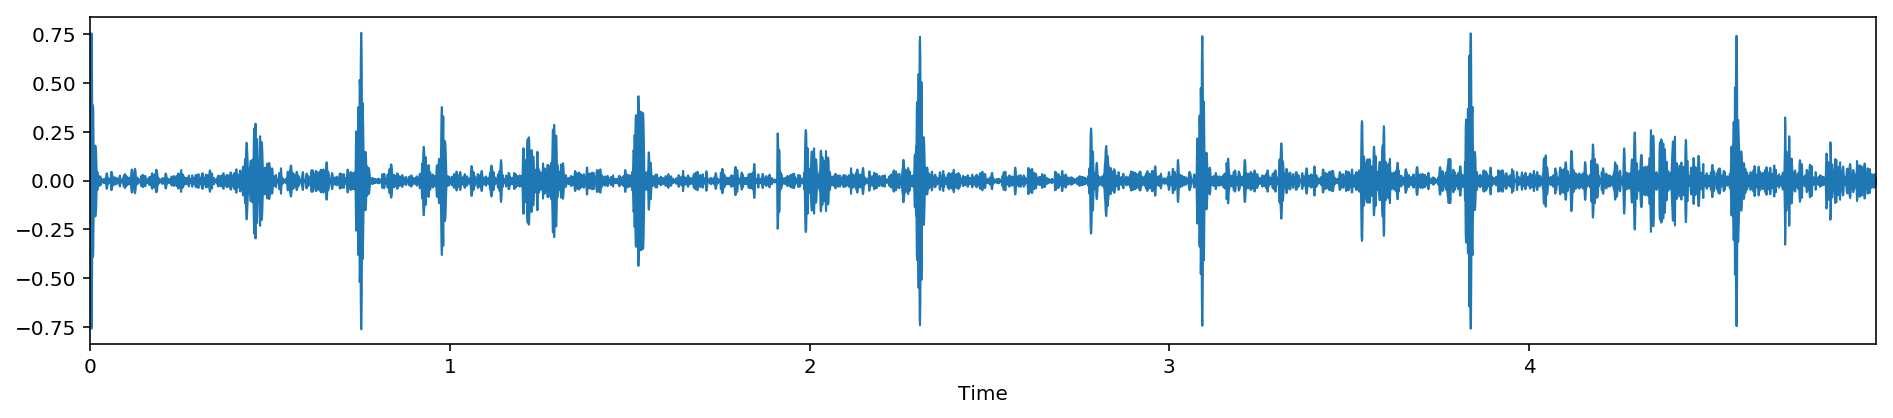

In [18]:
# librosa plot
plt.figure(figsize=(16, 3))
librosa.display.waveplot(y, sr=sr)

# 2. Murmur

Heart murmurs sound as though there is a “whooshing, roaring, rumbling, or turbulent fluid” noise in one of two temporal locations: (1) between “lub” and “dub”, or (2) between “dub” and “lub”. They can be a symptom of many heart disorders, some serious. There will still be a “lub” and a “dub”. One of the things that confuses non-medically trained people is that murmurs happen between lub and dub or between dub and lub; not on lub and not on dub.(source: R

In [19]:
# murmur case
murmur_file=INPUT_DIR+"/set_a/murmur__201108222231.wav"
y2, sr2 = librosa.load(murmur_file,duration=5)
dur=librosa.get_duration(y)
print ("duration:", dur)
print(y2.shape,sr2)

duration: 4.963809523809524
(110250,) 22050


In [20]:
# heart it
import IPython.display as ipd
ipd.Audio(murmur_file) 

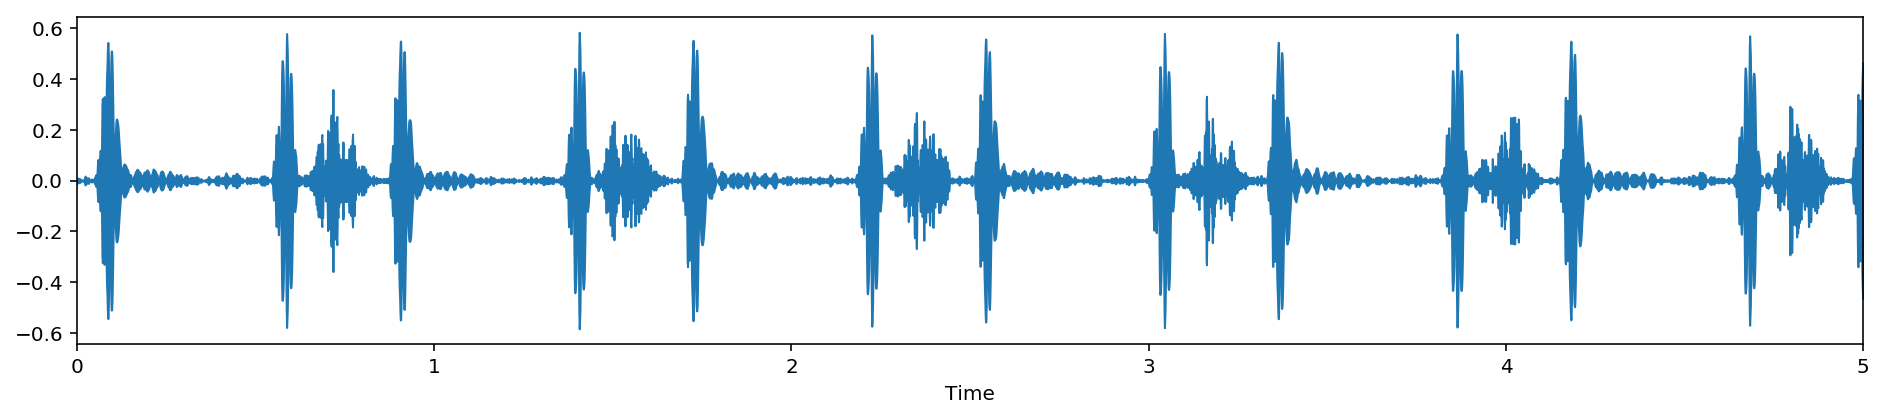

In [21]:
# show it
plt.figure(figsize=(16, 3))
librosa.display.waveplot(y2, sr=sr2)

# 3. Extrasystole

Extrasystole sounds may appear occasionally and can be identified because there is a heart sound that is out of rhythm involving extra or skipped heartbeats, e.g. a “lub-lub dub” or a “lub dub-dub”. (This is not the same as an extra heart sound as the event is not regularly occuring.) An extrasystole may not be a sign of disease. It can happen normally in an adult and can be very common in children. However, in some situations extrasystoles can be caused by heart diseases. If these diseases are detected earlier, then treatment is likely to be more effective. (source: Rita Getz)

In [22]:
# Extrasystole case
extrastole_file=INPUT_DIR+"/set_b/extrastole__127_1306764300147_C2.wav"
y3, sr3 = librosa.load(extrastole_file, duration=5)
dur=librosa.get_duration(y)
print ("duration:", dur)
print(y3.shape,sr3)

duration: 4.963809523809524
(103106,) 22050


In [23]:
# heart it
import IPython.display as ipd
ipd.Audio(extrastole_file) 

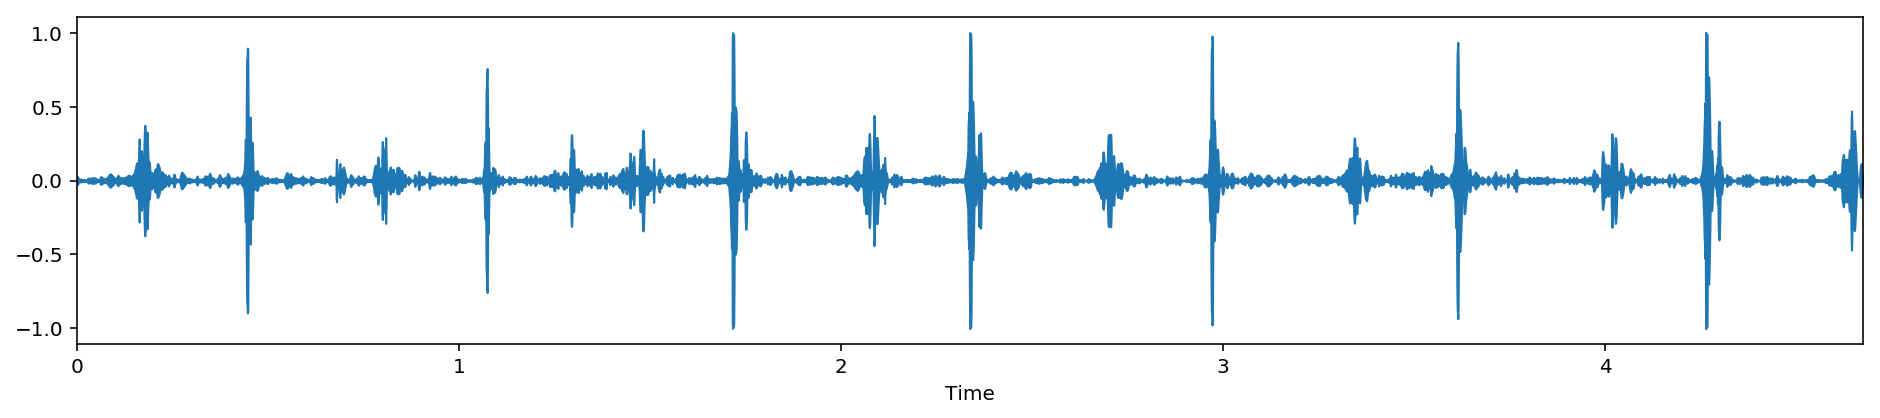

In [24]:
# show it
plt.figure(figsize=(16, 3))
librosa.display.waveplot(y3, sr=sr3)

# 4. Artifact

In the Artifact category there are a wide range of different sounds, including feedback squeals and echoes, speech, music and noise. There are usually no discernable heart sounds, and thus little or no temporal periodicity at frequencies below 195 Hz. This category is the most different from the others. It is important to be able to distinguish this category from the other three categories, so that someone gathering the data can be instructed to try again.(source: Rita Getz)

In [25]:
# sample file
artifact_file=INPUT_DIR+"/set_a/artifact__201012172012.wav"
y4, sr4 = librosa.load(artifact_file, duration=5)
dur=librosa.get_duration(y)
print ("duration:", dur)
print(y4.shape,sr4)

duration: 4.963809523809524
(110250,) 22050


In [26]:
# heart it
import IPython.display as ipd
ipd.Audio(artifact_file) 

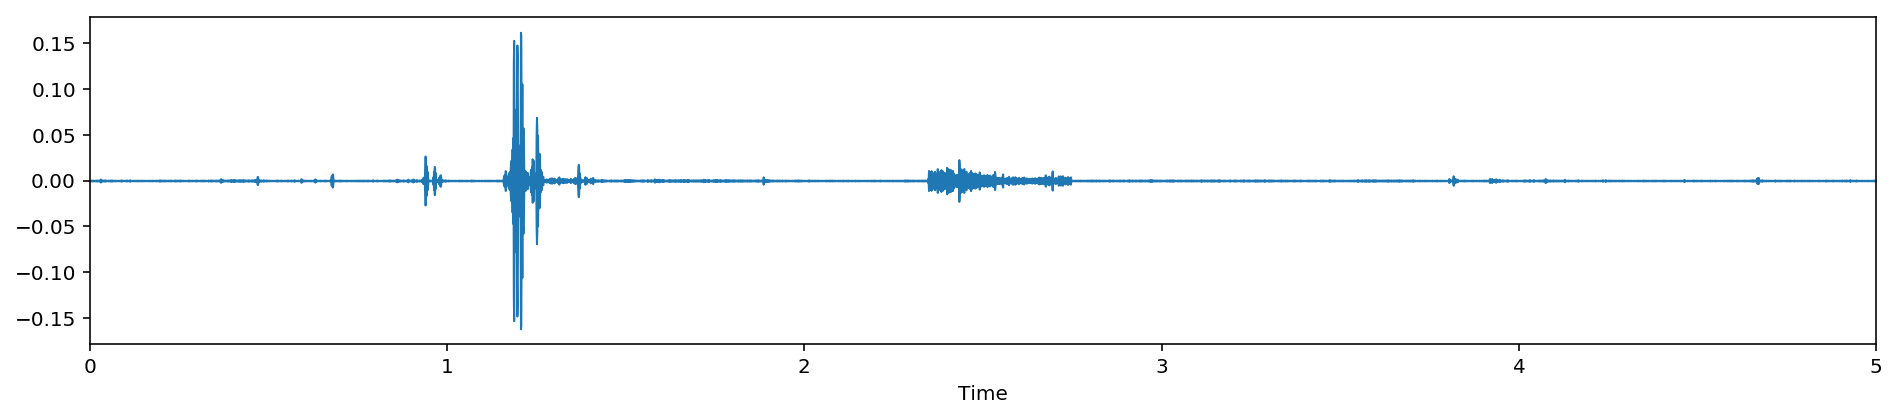

In [27]:
# show it
plt.figure(figsize=(16, 3))
librosa.display.waveplot(y4, sr=sr4)

# 5. Extra Heart Sound

In the Artifact category there are a wide range of different sounds, including feedback squeals and echoes, speech, music and noise. There are usually no discernable heart sounds, and thus little or no temporal periodicity at frequencies below 195 Hz. This category is the most different from the others. It is important to be able to distinguish this category from the other three categories, so that someone gathering the data can be instructed to try again.(source: Rita Getz)

In [28]:
# sample file
extrahls_file=INPUT_DIR+"/set_a/extrahls__201101070953.wav"
y5, sr5 = librosa.load(extrahls_file, duration=5)
dur=librosa.get_duration(y)
print ("duration:", dur)
print(y5.shape,sr5)

duration: 4.963809523809524
(110250,) 22050


In [29]:
# heart it
import IPython.display as ipd
ipd.Audio(extrahls_file) 

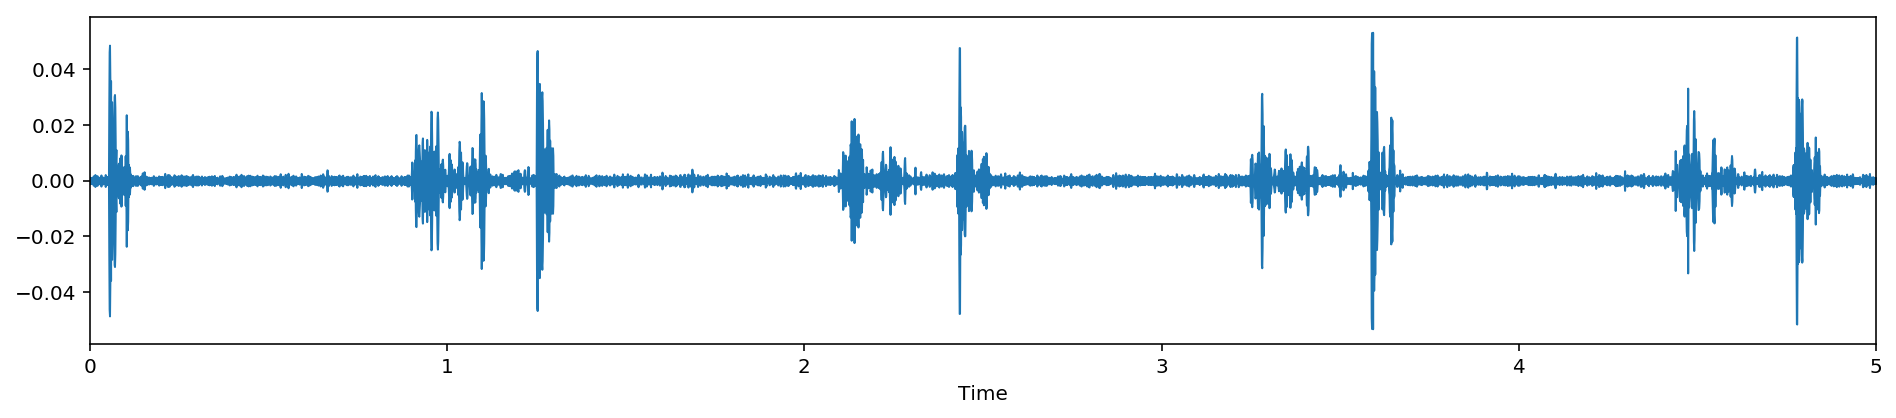

In [30]:
# show it
plt.figure(figsize=(16, 3))
librosa.display.waveplot(y5, sr=sr5)

# Loading Data

In [31]:
print("Number of training examples=", train_ab.shape[0], "  Number of classes=", len(train_ab.label.unique()))

Number of training examples= 832   Number of classes= 6




Loading od the audio data file will be based on content from directory since each filename is associate with the category type. hence, we can use csv file for cross reference check. Based on directory content approach will be more flexible.

In [32]:
def audio_norm(data):
    max_data = np.max(data)
    min_data = np.min(data)
    data = (data-min_data)/(max_data-min_data+0.0001)
    return data-0.5

# get audio data without padding highest qualify audio
def load_file_data_without_change(folder,file_names, duration=3, sr=16000):
    input_length=sr*duration
    # function to load files and extract features
    # file_names = glob.glob(os.path.join(folder, '*.wav'))
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            # use kaiser_fast technique for faster extraction
            X, sr = librosa.load( sound_file, res_type='kaiser_fast') 
            dur = librosa.get_duration(y=X, sr=sr)
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T,axis=0) 
        except Exception as e:
            print("Error encountered while parsing file: ", file)
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data


# get audio data with a fix padding may also chop off some file
def load_file_data (folder,file_names, duration=12, sr=16000):
    input_length=sr*duration
    # function to load files and extract features
    # file_names = glob.glob(os.path.join(folder, '*.wav'))
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            # use kaiser_fast technique for faster extraction
            X, sr = librosa.load( sound_file, sr=sr, duration=duration,res_type='kaiser_fast') 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio lenght :", file_name)
                y = librosa.util.fix_length(X, input_length)                
            #normalized raw audio 
            # y = audio_norm(y)            
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data


In [33]:
# simple encoding of categories, limited to 3 types
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Map label text to integer
CLASSES = ['artifact','murmur','normal']
# {'artifact': 0, 'murmur': 1, 'normal': 3}
NB_CLASSES=len(CLASSES)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
print (" ")
# map integer to label text
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'artifact': 0, 'murmur': 1, 'normal': 2}
 
{0: 'artifact', 1: 'murmur', 2: 'normal'}


In [34]:
# load dataset-a, keep them separate for testing purpose
import os, fnmatch

A_folder=INPUT_DIR+'/set_a/'
# set-a
A_artifact_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'artifact*.wav')
A_artifact_sounds = load_file_data(folder=A_folder,file_names=A_artifact_files, duration=MAX_SOUND_CLIP_DURATION)
A_artifact_labels = [0 for items in A_artifact_files]

A_normal_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'normal*.wav')
A_normal_sounds = load_file_data(folder=A_folder,file_names=A_normal_files, duration=MAX_SOUND_CLIP_DURATION)
A_normal_labels = [2 for items in A_normal_sounds]

A_extrahls_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'extrahls*.wav')
A_extrahls_sounds = load_file_data(folder=A_folder,file_names=A_extrahls_files, duration=MAX_SOUND_CLIP_DURATION)
A_extrahls_labels = [1 for items in A_extrahls_sounds]

A_murmur_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'murmur*.wav')
A_murmur_sounds = load_file_data(folder=A_folder,file_names=A_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
A_murmur_labels = [1 for items in A_murmur_files]

# test files
A_unlabelledtest_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'Aunlabelledtest*.wav')
A_unlabelledtest_sounds = load_file_data(folder=A_folder,file_names=A_unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
A_unlabelledtest_labels = [-1 for items in A_unlabelledtest_sounds]

print ("loaded dataset-a")

load file  ./set_a/artifact__201012172012.wav
fixing audio lenght : artifact__201012172012.wav
load file  ./set_a/artifact__201105040918.wav
fixing audio lenght : artifact__201105040918.wav
load file  ./set_a/artifact__201105041959.wav
fixing audio lenght : artifact__201105041959.wav
load file  ./set_a/artifact__201105051017.wav
fixing audio lenght : artifact__201105051017.wav
load file  ./set_a/artifact__201105060108.wav
fixing audio lenght : artifact__201105060108.wav
load file  ./set_a/artifact__201105061143.wav
fixing audio lenght : artifact__201105061143.wav
load file  ./set_a/artifact__201105190800.wav
fixing audio lenght : artifact__201105190800.wav
load file  ./set_a/artifact__201105280851.wav
fixing audio lenght : artifact__201105280851.wav
load file  ./set_a/artifact__201106010559.wav
fixing audio lenght : artifact__201106010559.wav
load file  ./set_a/artifact__201106010602.wav
fixing audio lenght : artifact__201106010602.wav
load file  ./set_a/artifact__201106021541.wav
fixi

fixing audio lenght : extrahls__201104270459.wav
load file  ./set_a/murmur__201101051104.wav
fixing audio lenght : murmur__201101051104.wav
load file  ./set_a/murmur__201101051108.wav
fixing audio lenght : murmur__201101051108.wav
load file  ./set_a/murmur__201101051114.wav
fixing audio lenght : murmur__201101051114.wav
load file  ./set_a/murmur__201101180902.wav
fixing audio lenght : murmur__201101180902.wav
load file  ./set_a/murmur__201102051443.wav
fixing audio lenght : murmur__201102051443.wav
load file  ./set_a/murmur__201102052338.wav
fixing audio lenght : murmur__201102052338.wav
load file  ./set_a/murmur__201103291548.wav
fixing audio lenght : murmur__201103291548.wav
load file  ./set_a/murmur__201104021355.wav
fixing audio lenght : murmur__201104021355.wav
load file  ./set_a/murmur__201104241315.wav
fixing audio lenght : murmur__201104241315.wav
load file  ./set_a/murmur__201104291843.wav
fixing audio lenght : murmur__201104291843.wav
load file  ./set_a/murmur__201106141148.w

fixing audio lenght : Aunlabelledtest__201108222234.wav
load file  ./set_a/Aunlabelledtest__201108222241.wav
fixing audio lenght : Aunlabelledtest__201108222241.wav
load file  ./set_a/Aunlabelledtest__201108222244.wav
fixing audio lenght : Aunlabelledtest__201108222244.wav
load file  ./set_a/Aunlabelledtest__201108222247.wav
fixing audio lenght : Aunlabelledtest__201108222247.wav
load file  ./set_a/Aunlabelledtest__201108222254.wav
fixing audio lenght : Aunlabelledtest__201108222254.wav
load file  ./set_a/Aunlabelledtest__201108222257.wav
fixing audio lenght : Aunlabelledtest__201108222257.wav
loaded dataset-a


In [35]:
%%time
# load dataset-b, keep them separate for testing purpose 
B_folder=INPUT_DIR+'/set_b/'
# set-b
B_normal_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'normal*.wav')  # include noisy files
B_normal_sounds = load_file_data(folder=B_folder,file_names=B_normal_files, duration=MAX_SOUND_CLIP_DURATION)
B_normal_labels = [2 for items in B_normal_sounds]

B_murmur_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'murmur*.wav')  # include noisy files
B_murmur_sounds = load_file_data(folder=B_folder,file_names=B_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
B_murmur_labels = [1 for items in B_murmur_files]

B_extrastole_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'extrastole*.wav')
B_extrastole_sounds = load_file_data(folder=B_folder,file_names=B_extrastole_files, duration=MAX_SOUND_CLIP_DURATION)
B_extrastole_labels = [1 for items in B_extrastole_files]

#test files
B_unlabelledtest_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'Bunlabelledtest*.wav')
B_unlabelledtest_sounds = load_file_data(folder=B_folder,file_names=B_unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
B_unlabelledtest_labels = [-1 for items in B_unlabelledtest_sounds]
print ("loaded dataset-b")

load file  ./set_b/normal_noisynormal_101_1305030823364_B.wav
fixing audio lenght : normal_noisynormal_101_1305030823364_B.wav
load file  ./set_b/normal_noisynormal_101_1305030823364_E.wav
fixing audio lenght : normal_noisynormal_101_1305030823364_E.wav
load file  ./set_b/normal_noisynormal_104_1305032492469_A.wav
fixing audio lenght : normal_noisynormal_104_1305032492469_A.wav
load file  ./set_b/normal_noisynormal_105_1305033453095_A.wav
fixing audio lenght : normal_noisynormal_105_1305033453095_A.wav
load file  ./set_b/normal_noisynormal_105_1305033453095_C.wav
fixing audio lenght : normal_noisynormal_105_1305033453095_C.wav
load file  ./set_b/normal_noisynormal_106_1306776721273_A.wav
fixing audio lenght : normal_noisynormal_106_1306776721273_A.wav
load file  ./set_b/normal_noisynormal_107_1305654946865_A.wav
fixing audio lenght : normal_noisynormal_107_1305654946865_A.wav
load file  ./set_b/normal_noisynormal_108_1305654420093_A.wav
fixing audio lenght : normal_noisynormal_108_1305

fixing audio lenght : normal_noisynormal_150_1306776340746_A.wav
load file  ./set_b/normal_noisynormal_151_1306779785624_C.wav
load file  ./set_b/normal_noisynormal_154_1306935608852_C.wav
fixing audio lenght : normal_noisynormal_154_1306935608852_C.wav
load file  ./set_b/normal_noisynormal_155_1306935902813_A.wav
load file  ./set_b/normal_noisynormal_155_1306935902813_C.wav
fixing audio lenght : normal_noisynormal_155_1306935902813_C.wav
load file  ./set_b/normal_noisynormal_157_1306937583792_A.wav
fixing audio lenght : normal_noisynormal_157_1306937583792_A.wav
load file  ./set_b/normal_noisynormal_157_1306937583792_B.wav
load file  ./set_b/normal_noisynormal_158_1306947254705_B1.wav
fixing audio lenght : normal_noisynormal_158_1306947254705_B1.wav
load file  ./set_b/normal_noisynormal_158_1306947254705_D.wav
load file  ./set_b/normal_noisynormal_159_1307018640315_A1.wav
fixing audio lenght : normal_noisynormal_159_1307018640315_A1.wav
load file  ./set_b/normal_noisynormal_159_130701

fixing audio lenght : normal__137_1306764999211_D.wav
load file  ./set_b/normal__139_1306519274653_A.wav
fixing audio lenght : normal__139_1306519274653_A.wav
load file  ./set_b/normal__140_1306519735121_A.wav
fixing audio lenght : normal__140_1306519735121_A.wav
load file  ./set_b/normal__140_1306519735121_B.wav
fixing audio lenght : normal__140_1306519735121_B.wav
load file  ./set_b/normal__140_1306519735121_D1.wav
fixing audio lenght : normal__140_1306519735121_D1.wav
load file  ./set_b/normal__141_1306520154450_B.wav
fixing audio lenght : normal__141_1306520154450_B.wav
load file  ./set_b/normal__141_1306520154450_C.wav
fixing audio lenght : normal__141_1306520154450_C.wav
load file  ./set_b/normal__143_1306763822290_B.wav
fixing audio lenght : normal__143_1306763822290_B.wav
load file  ./set_b/normal__143_1306763822290_C.wav
fixing audio lenght : normal__143_1306763822290_C.wav
load file  ./set_b/normal__145_1307987561278_B.wav
fixing audio lenght : normal__145_1307987561278_B.wav

fixing audio lenght : normal__186_1308073648738_D.wav
load file  ./set_b/normal__188_1308074301731_C.wav
fixing audio lenght : normal__188_1308074301731_C.wav
load file  ./set_b/normal__188_1308074301731_D.wav
fixing audio lenght : normal__188_1308074301731_D.wav
load file  ./set_b/normal__190_1308076920011_C1.wav
fixing audio lenght : normal__190_1308076920011_C1.wav
load file  ./set_b/normal__190_1308076920011_D.wav
fixing audio lenght : normal__190_1308076920011_D.wav
load file  ./set_b/normal__191_1308077299430_B.wav
load file  ./set_b/normal__194_1308139824187_A.wav
fixing audio lenght : normal__194_1308139824187_A.wav
load file  ./set_b/normal__194_1308139824187_A1.wav
fixing audio lenght : normal__194_1308139824187_A1.wav
load file  ./set_b/normal__198_1308141739338_C.wav
fixing audio lenght : normal__198_1308141739338_C.wav
load file  ./set_b/normal__201_1308144942432_A.wav
fixing audio lenght : normal__201_1308144942432_A.wav
load file  ./set_b/normal__201_1308144942432_A1.wav

fixing audio lenght : normal__296_1311682952647_A1.wav
load file  ./set_b/normal__296_1311682952647_A2.wav
fixing audio lenght : normal__296_1311682952647_A2.wav
load file  ./set_b/normal__298_1311685888900_B.wav
fixing audio lenght : normal__298_1311685888900_B.wav
load file  ./set_b/normal__299_1311770522820_C.wav
fixing audio lenght : normal__299_1311770522820_C.wav
load file  ./set_b/normal__300_1311772096120_C1.wav
fixing audio lenght : normal__300_1311772096120_C1.wav
load file  ./set_b/murmur_noisymurmur_135_1306428972976_A.wav
fixing audio lenght : murmur_noisymurmur_135_1306428972976_A.wav
load file  ./set_b/murmur_noisymurmur_135_1306428972976_B.wav
fixing audio lenght : murmur_noisymurmur_135_1306428972976_B.wav
load file  ./set_b/murmur_noisymurmur_135_1306428972976_C.wav
load file  ./set_b/murmur_noisymurmur_156_1306936373241_A.wav
fixing audio lenght : murmur_noisymurmur_156_1306936373241_A.wav
load file  ./set_b/murmur_noisymurmur_156_1306936373241_B1.wav
fixing audio le

fixing audio lenght : murmur__245_1309200438094_B.wav
load file  ./set_b/murmur__248_1309201683806_A.wav
fixing audio lenght : murmur__248_1309201683806_A.wav
load file  ./set_b/murmur__248_1309201683806_C.wav
fixing audio lenght : murmur__248_1309201683806_C.wav
load file  ./set_b/murmur__254_1309350589009_A.wav
fixing audio lenght : murmur__254_1309350589009_A.wav
load file  ./set_b/murmur__254_1309350589009_A1.wav
fixing audio lenght : murmur__254_1309350589009_A1.wav
load file  ./set_b/murmur__254_1309350589009_C.wav
fixing audio lenght : murmur__254_1309350589009_C.wav
load file  ./set_b/murmur__254_1309350589009_D.wav
fixing audio lenght : murmur__254_1309350589009_D.wav
load file  ./set_b/murmur__276_1311162716489_C.wav
fixing audio lenght : murmur__276_1311162716489_C.wav
load file  ./set_b/murmur__281_1311165683454_A.wav
fixing audio lenght : murmur__281_1311165683454_A.wav
load file  ./set_b/murmur__281_1311165683454_B.wav
fixing audio lenght : murmur__281_1311165683454_B.wav

load file  ./set_b/Bunlabelledtest__113_1306244002866_C.wav
fixing audio lenght : Bunlabelledtest__113_1306244002866_C.wav
load file  ./set_b/Bunlabelledtest__115_1306259437619_D.wav
fixing audio lenght : Bunlabelledtest__115_1306259437619_D.wav
load file  ./set_b/Bunlabelledtest__116_1306258689913_B.wav
load file  ./set_b/Bunlabelledtest__117_1306262456650_B1.wav
fixing audio lenght : Bunlabelledtest__117_1306262456650_B1.wav
load file  ./set_b/Bunlabelledtest__118_1306262335509_A.wav
fixing audio lenght : Bunlabelledtest__118_1306262335509_A.wav
load file  ./set_b/Bunlabelledtest__118_1306262335509_A1.wav
fixing audio lenght : Bunlabelledtest__118_1306262335509_A1.wav
load file  ./set_b/Bunlabelledtest__118_1306262335509_C2.wav
fixing audio lenght : Bunlabelledtest__118_1306262335509_C2.wav
load file  ./set_b/Bunlabelledtest__121_1306263877235_B.wav
load file  ./set_b/Bunlabelledtest__122_1306325762831_A.wav
fixing audio lenght : Bunlabelledtest__122_1306325762831_A.wav
load file  ./

load file  ./set_b/Bunlabelledtest__165_1307109069581_B.wav
fixing audio lenght : Bunlabelledtest__165_1307109069581_B.wav
load file  ./set_b/Bunlabelledtest__167_1307111318050_C1.wav
fixing audio lenght : Bunlabelledtest__167_1307111318050_C1.wav
load file  ./set_b/Bunlabelledtest__167_1307111318050_D.wav
fixing audio lenght : Bunlabelledtest__167_1307111318050_D.wav
load file  ./set_b/Bunlabelledtest__169_1307970398039_B.wav
load file  ./set_b/Bunlabelledtest__169_1307970398039_C1.wav
fixing audio lenght : Bunlabelledtest__169_1307970398039_C1.wav
load file  ./set_b/Bunlabelledtest__170_1307970562729_D.wav
load file  ./set_b/Bunlabelledtest__171_1307971016233_C.wav
fixing audio lenght : Bunlabelledtest__171_1307971016233_C.wav
load file  ./set_b/Bunlabelledtest__171_1307971016233_F.wav
fixing audio lenght : Bunlabelledtest__171_1307971016233_F.wav
load file  ./set_b/Bunlabelledtest__172_1307971284351_C.wav
fixing audio lenght : Bunlabelledtest__172_1307971284351_C.wav
load file  ./se

fixing audio lenght : Bunlabelledtest__254_1309350589009_B.wav
load file  ./set_b/Bunlabelledtest__255_1309351210897_B.wav
fixing audio lenght : Bunlabelledtest__255_1309351210897_B.wav
load file  ./set_b/Bunlabelledtest__259_1309352630271_B.wav
fixing audio lenght : Bunlabelledtest__259_1309352630271_B.wav
load file  ./set_b/Bunlabelledtest__260_1309353164458_A.wav
fixing audio lenght : Bunlabelledtest__260_1309353164458_A.wav
load file  ./set_b/Bunlabelledtest__262_1309355283807_B.wav
fixing audio lenght : Bunlabelledtest__262_1309355283807_B.wav
load file  ./set_b/Bunlabelledtest__264_1309356143724_A.wav
fixing audio lenght : Bunlabelledtest__264_1309356143724_A.wav
load file  ./set_b/Bunlabelledtest__268_1309368960960_A.wav
fixing audio lenght : Bunlabelledtest__268_1309368960960_A.wav
load file  ./set_b/Bunlabelledtest__268_1309368960960_E.wav
fixing audio lenght : Bunlabelledtest__268_1309368960960_E.wav
load file  ./set_b/Bunlabelledtest__270_1309369533040_D.wav
fixing audio len

In [37]:
#combine set-a and set-b 
x_data = np.concatenate((A_artifact_sounds, A_normal_sounds,A_extrahls_sounds,A_murmur_sounds, 
                         B_normal_sounds,B_murmur_sounds,B_extrastole_sounds))

y_data = np.concatenate((A_artifact_labels, A_normal_labels,A_extrahls_labels,A_murmur_labels,
                         B_normal_labels,B_murmur_labels,B_extrastole_labels))

test_x = np.concatenate((A_unlabelledtest_sounds,B_unlabelledtest_sounds))
test_y = np.concatenate((A_unlabelledtest_labels,B_unlabelledtest_labels))

print ("combined training data record: ",len(y_data), len(test_y))


combined training data record:  585 247


In [38]:
# shuffle - whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.
# random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

seed = 1000
# split data into Train, Validation and Test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.9, random_state=seed, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.9, random_state=seed, shuffle=True)

# One-Hot encoding for classes
y_train = np.array(keras.utils.to_categorical(y_train, len(CLASSES)))
y_test = np.array(keras.utils.to_categorical(y_test, len(CLASSES)))
y_val = np.array(keras.utils.to_categorical(y_val, len(CLASSES)))
test_y=np.array(keras.utils.to_categorical(test_y, len(CLASSES)))
print ("label shape: ", y_data.shape)
print ("data size of the array: : %s" % y_data.size)
print ("length of one array element in bytes: ", y_data.itemsize)
print ("total bytes consumed by the elements of the array: ", y_data.nbytes)
print (y_data[1])
print ("")
print ("audio data shape: ", x_data.shape)
print ("data size of the array: : %s" % x_data.size)
print ("length of one array element in bytes: ", x_data.itemsize)
print ("total bytes consumed by the elements of the array: ", x_data.nbytes)
#print (x_data[1])
print ("")
print ("training data shape: ", x_train.shape)
print ("training label shape: ", y_train.shape)
print ("")
print ("validation data shape: ", x_val.shape)
print ("validation label shape: ", y_val.shape)
print ("")
print ("test data shape: ", x_test.shape)
print ("test label shape: ", y_test.shape)

label shape:  (585,)
data size of the array: : 585
length of one array element in bytes:  4
total bytes consumed by the elements of the array:  2340
0

audio data shape:  (585, 40, 1)
data size of the array: : 23400
length of one array element in bytes:  8
total bytes consumed by the elements of the array:  187200

training data shape:  (473, 40, 1)
training label shape:  (473, 3)

validation data shape:  (53, 40, 1)
validation label shape:  (53, 3)

test data shape:  (59, 40, 1)
test label shape:  (59, 3)


# Deep learning RNN (Recurrent Neural Networks)-LSTM (Long Short-Term Memory)

In [39]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,TensorBoard,ProgbarLogger
from keras.utils import np_utils
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import itertools








Build Model

In [40]:
print('Build LSTM RNN model ...')
model = Sequential()
model.add(LSTM(units=64, dropout=0.05, recurrent_dropout=0.20, return_sequences=True,input_shape = (40,1)))
model.add(LSTM(units=32, dropout=0.05, recurrent_dropout=0.20, return_sequences=False))
model.add(Dense(len(CLASSES), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['acc','mse', 'mae', 'mape', 'cosine'])
model.summary()

Build LSTM RNN model ...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 40, 64)            16896     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 29,411
Trainable params: 29,411
Non-trainable params: 0
_________________________________________________________________


# Train Model

In [41]:
%%time
# saved model checkpoint file
best_model_file="./best_model_trained.hdf5"
#train_model_file=file_path+"/checkpoints/weights.best_{epoch:02d}-{loss:.2f}.hdf5"
MAX_PATIENT=12
MAX_EPOCHS=100
MAX_BATCH=32

# callbacks
# removed EarlyStopping(patience=MAX_PATIENT)
callback=[ReduceLROnPlateau(patience=MAX_PATIENT, verbose=1),
          ModelCheckpoint(filepath=best_model_file, monitor='loss', verbose=1, save_best_only=True)]

print ("training started..... please wait.")
# training
history=model.fit(x_train, y_train, 
                  batch_size=MAX_BATCH, 
                  epochs=MAX_EPOCHS,
                  verbose=0,
                  validation_data=(x_val, y_val),
                  callbacks=callback) 

print ("training finised!")

training started..... please wait.

Epoch 00001: loss improved from inf to 0.97941, saving model to ./best_model_trained.hdf5

Epoch 00002: loss improved from 0.97941 to 0.80225, saving model to ./best_model_trained.hdf5

Epoch 00003: loss improved from 0.80225 to 0.75970, saving model to ./best_model_trained.hdf5

Epoch 00004: loss improved from 0.75970 to 0.74567, saving model to ./best_model_trained.hdf5

Epoch 00005: loss improved from 0.74567 to 0.73923, saving model to ./best_model_trained.hdf5

Epoch 00006: loss did not improve from 0.73923

Epoch 00007: loss improved from 0.73923 to 0.70117, saving model to ./best_model_trained.hdf5

Epoch 00008: loss did not improve from 0.70117

Epoch 00009: loss did not improve from 0.70117

Epoch 00010: loss did not improve from 0.70117

Epoch 00011: loss did not improve from 0.70117

Epoch 00012: loss did not improve from 0.70117

Epoch 00013: loss improved from 0.70117 to 0.68459, saving model to ./best_model_trained.hdf5

Epoch 00014: lo

Model Evaluation

In [42]:
# Keras reported accuracy:
score = model.evaluate(x_train, y_train, verbose=0) 
print ("model train data score       : ",round(score[1]*100) , "%")

score = model.evaluate(x_test, y_test, verbose=0) 
print ("model test data score        : ",round(score[1]*100) , "%")

score = model.evaluate(x_val, y_val, verbose=0) 
print ("model validation data score  : ", round(score[1]*100), "%")

score = model.evaluate(test_x, test_y, verbose=0) 
print ("model unlabeled data score   : ", round(score[1]*100), "%")

model train data score       :  71.0 %
model test data score        :  71.0 %
model validation data score  :  75.0 %
model unlabeled data score   :  79.0 %


<Figure size 1584x720 with 0 Axes>

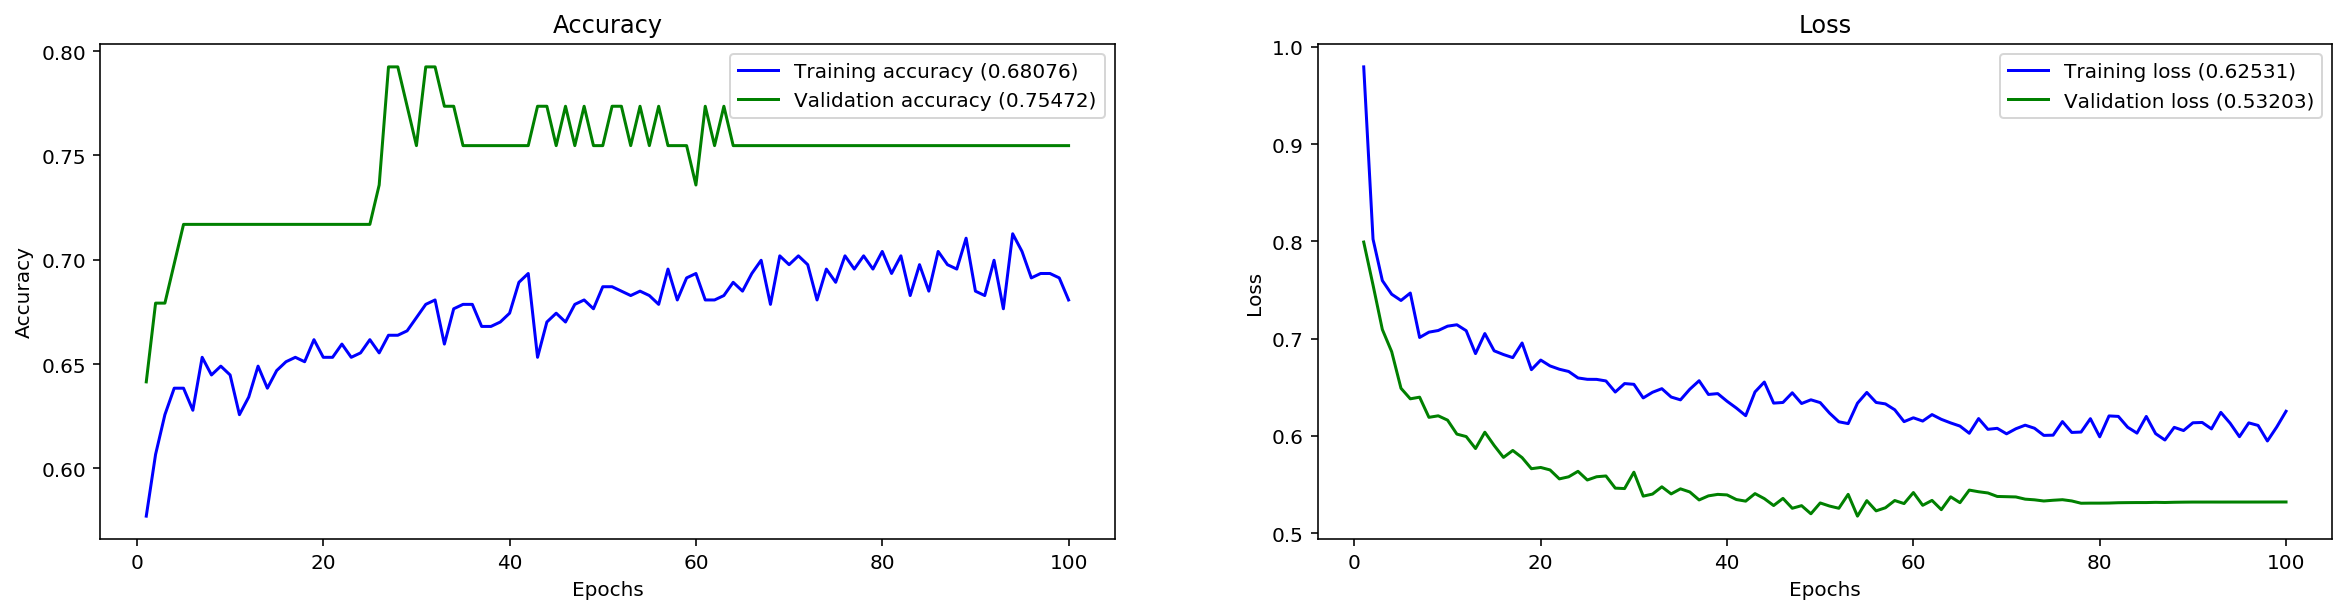

Wall time: 804 ms


In [43]:
%%time
#Plot Keras History
#Plot loss and accuracy for the training and validation set.
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    plt.figure(figsize=(22,10))
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    ## Accuracy
    plt.figure(221, figsize=(20,10))
    ## Accuracy
    # plt.figure(2,figsize=(14,5))
    plt.subplot(221, title='Accuracy')
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    ## Loss
    plt.subplot(222, title='Loss')
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# plot history
plot_history(history)

In [44]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


# Prediction Test


make a prediction x: The input data, as a Numpy array (or list of Numpy arrays if the model has multiple inputs). batch_size: Integer. If unspecified, it will default to 32. steps = Total number of steps (batches of samples) before declaring the prediction round finished. callbacks: List of keras.callbacks.Callback instances. returns Numpy array(s) of predictions.


In [45]:
# prediction class 
y_pred = model.predict_classes(x_test, batch_size=32)
print ("prediction test return :",y_pred[1], "-", int_to_label[y_pred[1]])


prediction test return : 2 - normal


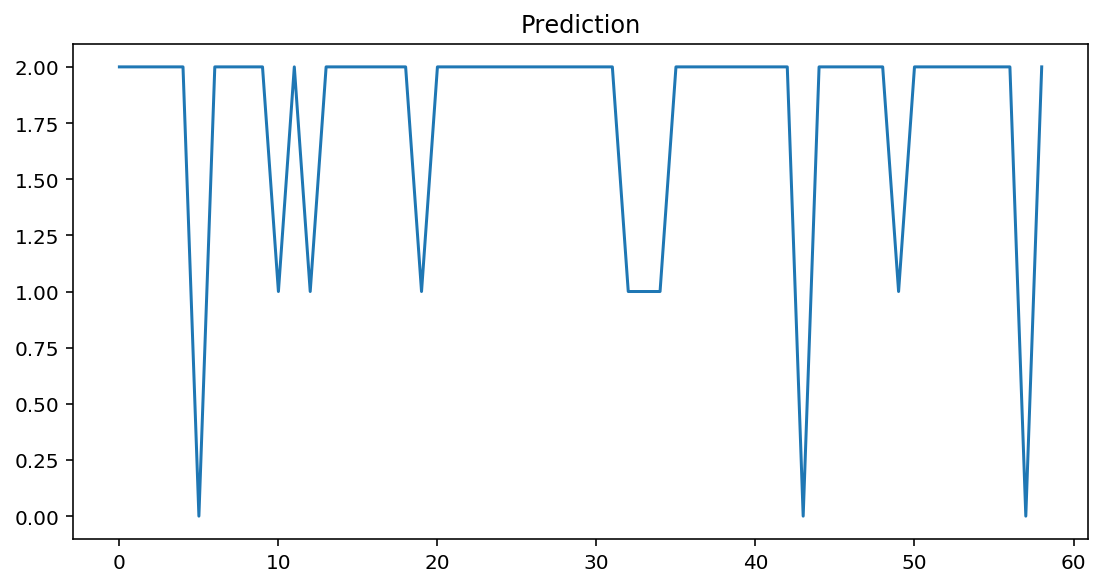

In [46]:
plt.figure(1,figsize=(20,10))
# plot Classification Metrics: Accuracy 
plt.subplot(221, title='Prediction')
plt.plot(y_pred)
plt.show()


In [47]:
print (best_model_file)


./best_model_trained.hdf5


In [48]:
### Loading a Check-Pointed Neural Network Model
# How to load and use weights from a checkpoint
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
print('Build LSTM RNN model ...')
model = Sequential()
model.add(LSTM(units=64, dropout=0.05, recurrent_dropout=0.35, return_sequences=True,input_shape = (40,1)))
model.add(LSTM(units=32, dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
model.add(Dense(len(CLASSES), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc','mse', 'mae', 'mape', 'cosine'])
model.summary()
# load weights
model.load_weights(best_model_file)
# Compile model (required to make predictions)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Created model and loaded weights from file")

Build LSTM RNN model ...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 40, 64)            16896     
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 29,411
Trainable params: 29,411
Non-trainable params: 0
_________________________________________________________________
Created model and loaded weights from file


# Test loaded model

In [49]:
# make a prediction
y_pred = model.predict_classes(x_test, batch_size=32)
#check scores
scores = model.evaluate(x_test, y_test, verbose=0)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

Model evaluation accuracy:  81.0 %
